<a href="https://colab.research.google.com/github/ngcthanh2903/AI-homework/blob/main/fruit/fruit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv #thư viện opencv để xử lý ảnh thô chuyển thành dữ liệu
import numpy as np # thư viện numpy
import os #lấy đường dẫn tới thư mục chứa hình ảnh

In [3]:
X = []#tạo list chứa dữ liệu ảnh
y = []#tạo list chứa label của từng ảnh
labels = os.listdir('/content/drive/MyDrive/fruit')#gọi biến labels là list gồm các thư mục data con chứa ảnh 

#tạo đường dẫn vào vào dataset
path='/content/drive/MyDrive'
dataset = 'fruit'

#cho biến label trong vòng lặp list labels 
for label in labels:
        
        # Và lặp các ảnh trong thư mục
        for file in os.listdir(os.path.join(path, dataset, label)):
            # đọc ảnh            
            image = cv.imread(os.path.join(path, dataset, label, file),cv.IMREAD_UNCHANGED)
            #chuyển ảnh cấu trúc màu BGR thành RGB
            image =cv.cvtColor(image,cv.COLOR_BGR2RGB)
            image =cv.GaussianBlur(image,(5,5),0,0)
            # chuyển tên các label thành dạng số 
            classnum = labels.index(label)
            #đưa shape ảnh về kích thước 50x50
            img = cv.resize(image,(200,200))
            img = cv.normalize(img, None, alpha=0,beta=255, norm_type=cv.NORM_MINMAX)

            #đưa dữ liệu ảnh đc xử lý vào list X          
            X.append(img)
            #đưa dữ liệu label vào list y
            y.append(classnum)

In [4]:
#đưa list X về dữ liệu dạng mảng tensor
X= np.array(X)
#đưa list y vễ dạng mảng
y= np.array(y)

In [5]:
X.shape

(552, 200, 200, 3)

In [6]:
keys = np.array(range(X.shape[0]))
np.random.shuffle(keys)
X = X[keys]
y = y[keys]

In [7]:
y

array([8, 0, 2, 8, 7, 0, 8, 8, 1, 0, 0, 9, 1, 2, 8, 0, 5, 3, 9, 4, 9, 6,
       4, 4, 4, 1, 9, 6, 8, 1, 9, 2, 8, 2, 8, 3, 6, 8, 5, 1, 6, 5, 5, 7,
       0, 9, 5, 3, 4, 6, 8, 0, 1, 2, 7, 2, 3, 3, 0, 7, 5, 5, 8, 0, 8, 3,
       2, 1, 7, 9, 3, 9, 5, 6, 1, 5, 9, 2, 8, 2, 3, 9, 3, 8, 0, 0, 0, 5,
       3, 9, 0, 5, 1, 8, 3, 0, 3, 5, 8, 4, 1, 8, 9, 7, 4, 0, 8, 1, 9, 9,
       5, 7, 9, 3, 8, 2, 0, 5, 7, 0, 6, 0, 3, 6, 1, 5, 3, 9, 0, 3, 5, 9,
       0, 9, 5, 6, 8, 2, 1, 1, 4, 3, 0, 8, 0, 5, 1, 4, 8, 1, 3, 9, 5, 8,
       1, 8, 7, 0, 3, 1, 6, 9, 3, 8, 8, 0, 0, 0, 8, 9, 1, 9, 4, 9, 0, 6,
       9, 6, 5, 2, 0, 9, 2, 7, 1, 0, 3, 6, 5, 3, 0, 8, 9, 1, 5, 9, 7, 3,
       1, 6, 3, 3, 6, 9, 8, 0, 8, 5, 0, 1, 3, 0, 0, 9, 1, 9, 6, 5, 9, 3,
       4, 3, 0, 0, 9, 3, 7, 7, 6, 4, 6, 9, 0, 6, 0, 9, 9, 0, 4, 9, 0, 0,
       8, 8, 0, 3, 8, 0, 9, 6, 3, 3, 5, 9, 2, 0, 2, 8, 3, 6, 2, 0, 6, 5,
       3, 1, 0, 4, 9, 9, 3, 4, 4, 8, 2, 3, 0, 7, 9, 8, 0, 4, 6, 2, 5, 9,
       8, 1, 3, 0, 8, 0, 1, 6, 4, 8, 0, 5, 0, 0, 1,

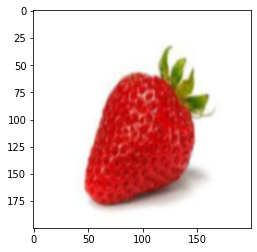

In [48]:
import matplotlib.pyplot as plt
plt.imshow(X[21])


In [32]:
from tensorflow.keras.utils import to_categorical
#onehot label y 
y= to_categorical(y,10)

In [34]:
y.shape

(552, 10)

In [35]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,BatchNormalization
model= Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(200,200,3)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2),strides= 5))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2),strides= 5))

model.add(BatchNormalization())


model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2),strides= 5))

model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 200, 200, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 40, 40, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 40, 40, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 40, 40, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                    

In [36]:
from tensorflow.keras.optimizers import Adam,SGD

#opt= SGD(lr=0.01,momentum=0.9)
#sử dụng optimizer Adam
opt =Adam()
#cấu hình train
model.compile(opt,loss='categorical_crossentropy',metrics=['accuracy'])
#bỏ dữ liệu vô train
history = model.fit(X, y, epochs=50, batch_size=64, validation_split=(0.1), verbose=1)
#lưu model
model.save('fruit.h5')

Epoch 1/50
8/8 [==============================] - 21s 841ms/step - loss: 2.2662 - accuracy: 0.3710 - val_loss: 12.0780 - val_accuracy: 0.2679
Epoch 2/50
8/8 [==============================] - 2s 284ms/step - loss: 0.8259 - accuracy: 0.7560 - val_loss: 9.2107 - val_accuracy: 0.2857
Epoch 3/50
8/8 [==============================] - 2s 285ms/step - loss: 0.3091 - accuracy: 0.9214 - val_loss: 10.9897 - val_accuracy: 0.2500
Epoch 4/50
8/8 [==============================] - 2s 286ms/step - loss: 0.1314 - accuracy: 0.9758 - val_loss: 8.3540 - val_accuracy: 0.3929
Epoch 5/50
8/8 [==============================] - 2s 285ms/step - loss: 0.0568 - accuracy: 0.9919 - val_loss: 6.2062 - val_accuracy: 0.4107
Epoch 6/50
8/8 [==============================] - 2s 285ms/step - loss: 0.0191 - accuracy: 0.9980 - val_loss: 5.0179 - val_accuracy: 0.4286
Epoch 7/50
8/8 [==============================] - 2s 283ms/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 4.3894 - val_accuracy: 0.4286
Epoch 8/50
8/8 [=

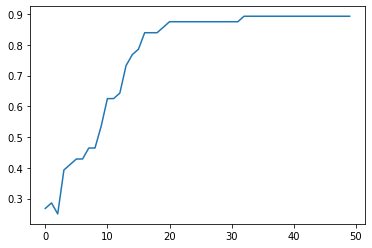

In [37]:
plt.plot(history.history['val_accuracy'])

In [ ]:
labels= {0:'nho',
         1:'dừa',
         2:'sau riêng',
         3:'chuoi',
         4:'xoai',
         5:'dưa hấu',
         6:'dâu',
         7:'thơm',
         8:'táo',
         9:'cam'}

[[4.3335140e-06 2.0483496e-07 7.1917683e-10 2.6787482e-11 2.3206499e-09
  4.5372912e-05 1.4278603e-04 2.3625039e-11 9.9980718e-01 8.5933536e-08]]
độ chính xác: 99 %
expectation tao


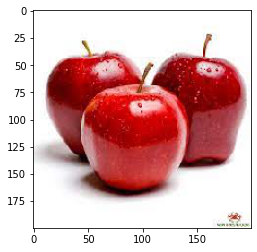

In [49]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array 
from keras.models import load_model
import numpy as np  
import matplotlib.pyplot as plt
import cv2 

# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(200, 200))	
	
	return img
model = load_model('fruit.h5')
	# load model
img = load_image('tao.jpg')
plt.imshow(img)
img = img_to_array(img)
img= cv.GaussianBlur(img,(35,35),0,0)

img = img.reshape(1,200,200,3)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)]) 

[[2.0235821e-04 4.0867442e-05 9.9880779e-01 1.2011300e-04 1.9819668e-04
  9.4560837e-06 1.2008081e-06 6.1431818e-04 2.9498776e-07 5.3060512e-06]]
độ chính xác: 99 %
expectation xaurieng


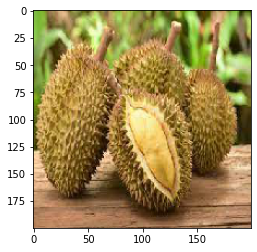

In [51]:
img = load_image('xaurieng.jpg')
plt.imshow(img)
img = img_to_array(img)
#img= cv.GaussianBlur(img,(35,35),0,0)

img = img.reshape(1,200,200,3)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)]) 

[[4.4107923e-01 5.5918507e-02 1.0283947e-04 5.0855197e-06 6.9410286e-05
  1.3199997e-01 1.9229113e-01 2.6547867e-03 1.7578173e-01 9.7283482e-05]]
độ chính xác: 44 %
expectation nho
nằm ngoài tập dữ liệu training


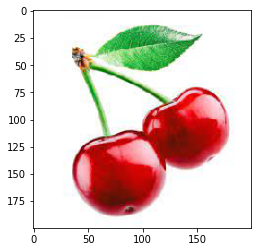

In [96]:
img = load_image('cherry.jpg')
plt.imshow(img)
img = img_to_array(img)
#img= cv.GaussianBlur(img,(15,15),0,0)

img = img.reshape(1,200,200,3)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)]) 
if (int(np.max(result*100)) <80):
  print('nằm ngoài tập dữ liệu training')

[[6.9270683e-03 7.8968827e-05 1.2661440e-05 6.5042259e-06 1.0050004e-06
  3.1151585e-02 4.8797476e-01 9.1933407e-06 4.7383812e-01 5.0005401e-08]]
độ chính xác: 48 %
expectation dau
nằm ngoài tập dữ liệu training


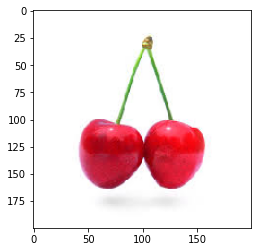

In [99]:
img = load_image('cherry1.jfif')
plt.imshow(img)
img = img_to_array(img)
img= cv.GaussianBlur(img,(15,15),0,0)

img = img.reshape(1,200,200,3)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)])
if (int(np.max(result*100)) <80):
  print('nằm ngoài tập dữ liệu training')

[[9.9414814e-01 9.6381854e-09 2.3983593e-10 4.1373159e-12 9.9297237e-10
  4.9057526e-05 2.3976543e-07 1.2084624e-10 5.8025154e-03 1.3979885e-09]]
độ chính xác: 99 %
expectation nho


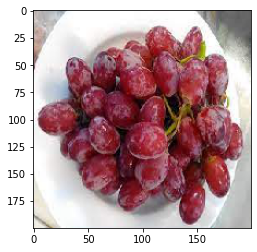

In [100]:
img = load_image('nho.jpg')
plt.imshow(img)
img = img_to_array(img)
img= cv.GaussianBlur(img,(15,15),0,0)

img = img.reshape(1,200,200,3)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)])

[[2.5566898e-05 9.9978358e-01 1.1408921e-05 3.9362676e-05 3.9149989e-05
  3.7505361e-05 3.7445907e-06 3.8258364e-07 5.7236699e-05 1.9659315e-06]]
độ chính xác: 99 %
expectation dua


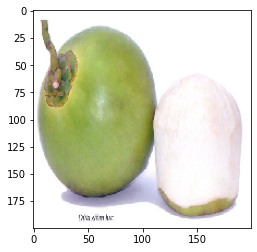

In [101]:
img = load_image('dua.jpg')
plt.imshow(img)
img = img_to_array(img)
img= cv.GaussianBlur(img,(5,5),0,0)

img = img.reshape(1,200,200,3)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)])

[[8.3263712e-03 6.6869920e-03 2.7391610e-01 3.0067226e-01 2.6344987e-02
  3.0793375e-01 3.6524460e-02 2.4828834e-02 1.4649809e-02 1.1643284e-04]]
độ tin cậy: 30 %
expectation duahau
Nằm ngoài dữ liệu training


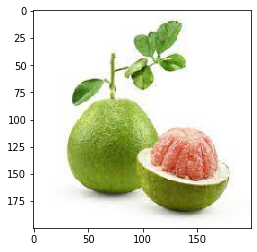

In [103]:
img = load_image('buoi.jfif')
plt.imshow(img)
img = img_to_array(img)
img= cv.GaussianBlur(img,(55,55),0,0)

img = img.reshape(1,200,200,3)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ tin cậy:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)])
if (int(np.max(result*100)) <80):
  print('Nằm ngoài dữ liệu training')


[[7.4448180e-04 7.8191487e-03 8.8364590e-04 5.9757695e-06 2.3729034e-02
  8.0796248e-01 6.3459486e-02 3.0676287e-04 5.7245303e-02 3.7843633e-02]]
độ chính xác: 80 %
expectation duahau


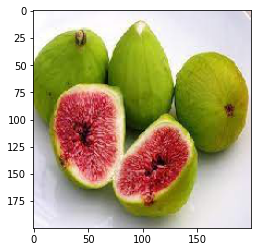

In [104]:
img = load_image('sung.jpg')
plt.imshow(img)
img = img_to_array(img)
img= cv.GaussianBlur(img,(15,15),0,0)

img = img.reshape(1,200,200,3)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)]) 
if (int(np.max(result*100)) <80):
  print('nằm ngoài tập dữ liệu training')

[[3.9658280e-05 6.1466629e-08 2.8268931e-07 3.2911604e-10 1.5789301e-07
  4.9602408e-03 2.1125503e-01 2.2290246e-08 7.8374153e-01 3.1016882e-06]]
độ chính xác: 78 %
expectation tao
nằm ngoài tập dữ liệu training


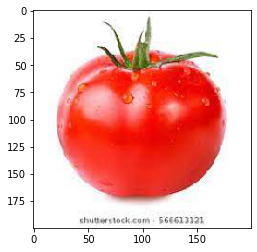

In [106]:
img = load_image('cachua.jpg')
plt.imshow(img)
img = img_to_array(img)
#img= cv.GaussianBlur(img,(35,35),0,0)

img = img.reshape(1,200,200,3)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)]) 
if (int(np.max(result*100)) <80):
  print('nằm ngoài tập dữ liệu training')

[[5.1093678e-04 2.9064972e-06 3.1804929e-03 5.4207130e-04 5.5675209e-01
  1.4614429e-07 1.6352720e-05 1.3473979e-01 4.3384809e-08 3.0425516e-01]]
độ chính xác: 55 %
expectation xoai
nằm ngoài tập dữ liệu training


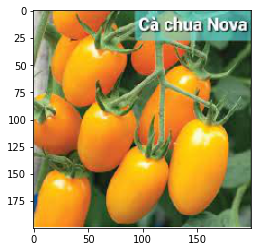

In [109]:
img = load_image('cachuacam.jfif')
plt.imshow(img)
img = img_to_array(img)
#img= cv.GaussianBlur(img,(35,35),0,0)

img = img.reshape(1,200,200,3)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)]) 
if (int(np.max(result*100)) <80):
  print('nằm ngoài tập dữ liệu training')

[[9.9973994e-01 1.9459898e-04 1.5100241e-08 1.4555785e-08 1.3583933e-07
  1.5920699e-07 7.8123076e-06 5.5748915e-05 1.5180652e-06 1.0843088e-09]]
độ chính xác: 99 %
expectation nho


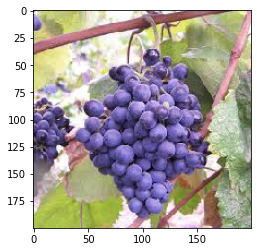

In [111]:
img = load_image('nho1.jpg')
plt.imshow(img)
img = img_to_array(img)
#img= cv.GaussianBlur(img,(35,35),0,0)

img = img.reshape(1,200,200,3)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)]) 
if (int(np.max(result*100)) <80):
  print('nằm ngoài tập dữ liệu training')

[[5.7210156e-04 1.7413552e-06 5.1844789e-04 1.6622422e-02 6.9926726e-03
  6.1325050e-06 4.3783613e-04 7.9210727e-03 2.0798654e-05 9.6690685e-01]]
độ chính xác: 96 %
expectation cam


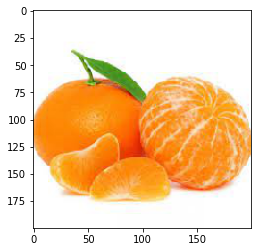

In [112]:
img = load_image('quyt.jpg')
plt.imshow(img)
img = img_to_array(img)
#img= cv.GaussianBlur(img,(35,35),0,0)

img = img.reshape(1,200,200,3)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)]) 
if (int(np.max(result*100)) <80):
  print('nằm ngoài tập dữ liệu training')

[[2.4001805e-02 4.9221975e-04 7.8322202e-01 3.9360557e-02 1.1354763e-02
  1.6511285e-03 2.9117352e-06 1.3607657e-01 3.5255172e-07 3.8376690e-03]]
độ chính xác: 78 %
expectation xaurieng
nằm ngoài tập dữ liệu training


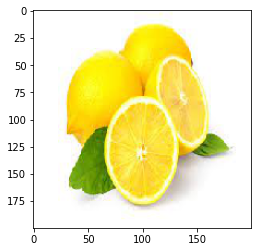

In [115]:
img = load_image('chanh.jfif')
plt.imshow(img)
img = img_to_array(img)
#img= cv.GaussianBlur(img,(35,35),0,0)

img = img.reshape(1,200,200,3)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)]) 
if (int(np.max(result*100)) <80):
  print('nằm ngoài tập dữ liệu training')

[[8.5373864e-02 2.4061941e-02 2.3374017e-02 2.5160410e-02 5.0679481e-01
  1.9960047e-03 4.2330013e-03 3.2315820e-01 2.2688901e-05 5.8250674e-03]]
độ chính xác: 50 %
expectation xoai
nằm ngoài tập dữ liệu training


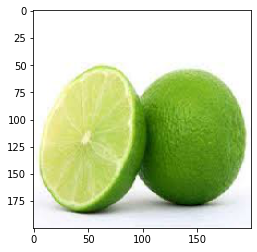

In [116]:
img = load_image('chanh.jpg')
plt.imshow(img)
img = img_to_array(img)
#img= cv.GaussianBlur(img,(35,35),0,0)

img = img.reshape(1,200,200,3)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)]) 
if (int(np.max(result*100)) <80):
  print('nằm ngoài tập dữ liệu training')

[[1.0408192e-03 7.6456825e-05 4.2633234e-05 2.6189508e-07 2.2132939e-03
  7.2006297e-01 1.9173728e-01 6.2036281e-04 3.7797980e-03 8.0426216e-02]]
độ chính xác: 72 %
expectation duahau
nằm ngoài tập dữ liệu training


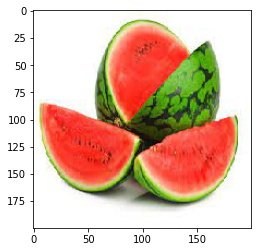

In [119]:
img = load_image('duahau.jpg')
plt.imshow(img)
img = img_to_array(img)
#img= cv.GaussianBlur(img,(35,35),0,0)

img = img.reshape(1,200,200,3)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)]) 
if (int(np.max(result*100)) <80):
  print('nằm ngoài tập dữ liệu training')

[[5.4422049e-03 2.0093343e-04 3.7402674e-04 2.0535069e-06 8.3909828e-05
  9.8879004e-01 3.6264639e-03 3.2598889e-04 8.3671225e-04 3.1770996e-04]]
độ chính xác: 98 %
expectation duahau


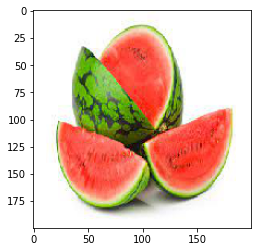

In [120]:
img = load_image('duahau1.jpg')
plt.imshow(img)
img = img_to_array(img)
#img= cv.GaussianBlur(img,(35,35),0,0)

img = img.reshape(1,200,200,3)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)]) 
if (int(np.max(result*100)) <80):
  print('nằm ngoài tập dữ liệu training')

[[9.99296308e-01 4.72421234e-04 3.35331765e-06 8.30684410e-09
  2.52401651e-06 1.06622654e-04 1.44671340e-05 1.13863862e-07
  7.03024343e-05 3.37809834e-05]]
độ chính xác: 99 %
expectation nho


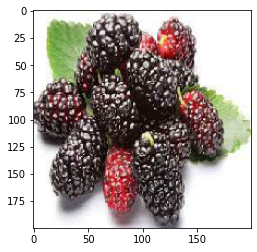

In [122]:
img = load_image('dautam.jpg')
plt.imshow(img)
img = img_to_array(img)
#img= cv.GaussianBlur(img,(35,35),0,0)

img = img.reshape(1,200,200,3)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)]) 
if (int(np.max(result*100)) <80):
  print('nằm ngoài tập dữ liệu training')

[[6.3524258e-01 3.8446091e-02 1.4937633e-02 1.8656783e-01 4.8837876e-03
  1.3160875e-02 1.6255860e-03 6.4317986e-02 4.0306397e-02 5.1119633e-04]]
độ chính xác: 63 %
expectation nho
nằm ngoài tập dữ liệu training


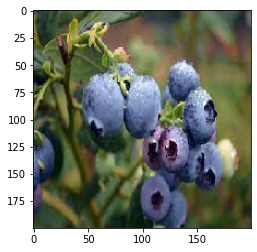

In [123]:
img = load_image('vietquoc.jpg')
plt.imshow(img)
img = img_to_array(img)
#img= cv.GaussianBlur(img,(35,35),0,0)

img = img.reshape(1,200,200,3)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)]) 
if (int(np.max(result*100)) <80):
  print('nằm ngoài tập dữ liệu training')

[[9.9101418e-01 5.1974352e-03 3.7157763e-06 1.9511477e-08 1.9186332e-06
  2.5428529e-03 3.7020649e-04 3.2955797e-06 7.8673870e-04 7.9533675e-05]]
độ chính xác: 99 %
expectation nho


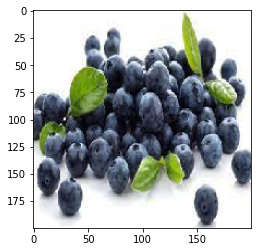

In [124]:
img = load_image('vietquoc1.jpg')
plt.imshow(img)
img = img_to_array(img)
#img= cv.GaussianBlur(img,(35,35),0,0)

img = img.reshape(1,200,200,3)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)]) 
if (int(np.max(result*100)) <80):
  print('nằm ngoài tập dữ liệu training')

[[0.31884405 0.01402674 0.13301493 0.14798313 0.06996638 0.08170781
  0.08378234 0.14322695 0.00315022 0.00429736]]
độ chính xác: 31 %
expectation nho
nằm ngoài tập dữ liệu training


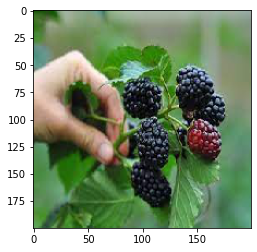

In [125]:
img = load_image('mamxoi.jpg')
plt.imshow(img)
img = img_to_array(img)
#img= cv.GaussianBlur(img,(35,35),0,0)

img = img.reshape(1,200,200,3)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)]) 
if (int(np.max(result*100)) <80):
  print('nằm ngoài tập dữ liệu training')

[[1.7229565e-03 1.1229655e-05 9.9248859e-07 4.3280430e-08 5.2253858e-07
  9.5409164e-03 5.7963669e-01 8.0901366e-08 4.0908632e-01 3.1405955e-07]]
độ chính xác: 57 %
expectation dau
nằm ngoài tập dữ liệu training


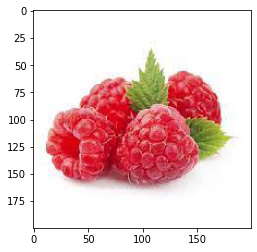

In [133]:
img = load_image('mamxoi1.jpg')
plt.imshow(img)
img = img_to_array(img)
#img= cv.GaussianBlur(img,(5,5),0,0)

img = img.reshape(1,200,200,3)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)]) 
if (int(np.max(result*100)) <80):
  print('nằm ngoài tập dữ liệu training')

[[6.2046666e-03 3.2346991e-06 1.2527563e-03 3.0345757e-07 8.6706281e-03
  2.8317235e-02 9.4626296e-01 6.0869008e-03 1.6593388e-03 1.5420351e-03]]
độ chính xác: 94 %
expectation dau


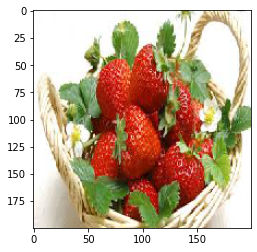

In [130]:
img = load_image('dautay.jpg')
plt.imshow(img)
img = img_to_array(img)
img= cv.GaussianBlur(img,(5,5),0,0)

img = img.reshape(1,200,200,3)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)]) 
if (int(np.max(result*100)) <80):
  print('nằm ngoài tập dữ liệu training')

[[6.3961442e-03 6.5603346e-04 1.2254787e-05 1.4248756e-07 2.0994901e-04
  1.3712800e-01 8.3887839e-01 3.3187519e-06 1.6165875e-02 5.4983777e-04]]
độ chính xác: 83 %
expectation dau


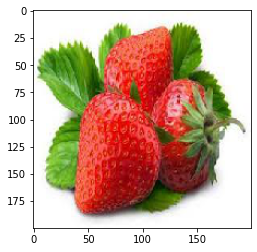

In [135]:
img = load_image('dautay1.jpg')
plt.imshow(img)
img = img_to_array(img)
#img= cv.GaussianBlur(img,(5,5),0,0)

img = img.reshape(1,200,200,3)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)]) 
if (int(np.max(result*100)) <80):
  print('nằm ngoài tập dữ liệu training')

[[1.27733171e-01 5.85418136e-04 7.48960197e-01 7.51361102e-02
  1.52870109e-02 3.21447221e-03 9.02096392e-04 1.43747143e-02
  5.87189752e-05 1.37480935e-02]]
độ chính xác: 74 %
expectation xaurieng
nằm ngoài tập dữ liệu training


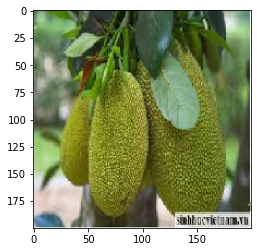

In [140]:
img = load_image('mit.jpg')
plt.imshow(img)
img = img_to_array(img)
#img= cv.GaussianBlur(img,(5,5),0,0)

img = img.reshape(1,200,200,3)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)]) 
if (int(np.max(result*100)) <80):
  print('nằm ngoài tập dữ liệu training')

[[4.2068397e-04 1.9513739e-03 4.8521361e-03 3.2616007e-01 5.5693462e-02
  2.7508289e-03 2.6646492e-04 5.0251567e-01 1.9517413e-06 1.0538734e-01]]
độ chính xác: 50 %
expectation thom
nằm ngoài tập dữ liệu training


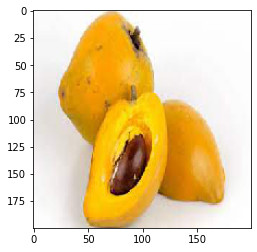

In [141]:
img = load_image('lekima.jpg')
plt.imshow(img)
img = img_to_array(img)
#img= cv.GaussianBlur(img,(5,5),0,0)

img = img.reshape(1,200,200,3)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)]) 
if (int(np.max(result*100)) <80):
  print('nằm ngoài tập dữ liệu training')

[[6.5112347e-04 1.1633128e-06 1.8571271e-05 4.7106813e-03 2.7988933e-03
  3.6966305e-06 1.4972569e-03 8.7529467e-03 4.7829133e-07 9.8156518e-01]]
độ chính xác: 98 %
expectation cam


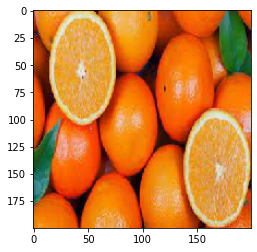

In [142]:
img = load_image('cam.jpg')
plt.imshow(img)
img = img_to_array(img)
#img= cv.GaussianBlur(img,(5,5),0,0)

img = img.reshape(1,200,200,3)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)]) 
if (int(np.max(result*100)) <80):
  print('nằm ngoài tập dữ liệu training')

[[4.1307529e-04 1.7878172e-04 1.0234491e-03 9.9645293e-01 7.0722349e-06
  1.4291711e-04 2.3018452e-05 1.7329318e-03 1.7037122e-05 8.7837534e-06]]
độ chính xác: 99 %
expectation chuoi


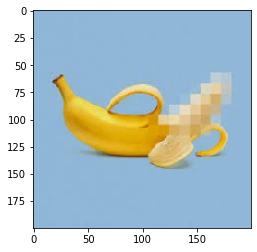

In [145]:
img = load_image('chuoinho.jfif')
plt.imshow(img)
img = img_to_array(img)
#img= cv.GaussianBlur(img,(5,5),0,0)

img = img.reshape(1,200,200,3)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)]) 
if (int(np.max(result*100)) <80):
  print('nằm ngoài tập dữ liệu training')

[[1.8480197e-04 2.2476055e-05 1.3758408e-06 3.7727317e-05 5.4599444e-05
  4.8791699e-06 1.5293725e-05 4.9317011e-04 2.5261652e-06 9.9918312e-01]]
độ chính xác: 99 %
expectation cam


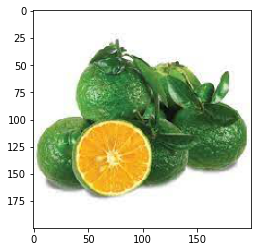

In [146]:
img = load_image('camsanh.jpg')
plt.imshow(img)
img = img_to_array(img)
#img= cv.GaussianBlur(img,(5,5),0,0)

img = img.reshape(1,200,200,3)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)]) 
if (int(np.max(result*100)) <80):
  print('nằm ngoài tập dữ liệu training')

[[1.9623783e-04 1.2909380e-06 2.2238675e-04 5.6022320e-05 2.8244322e-04
  3.1439921e-08 1.0933733e-06 9.9910319e-01 6.9962871e-09 1.3732795e-04]]
độ chính xác: 99 %
expectation thom


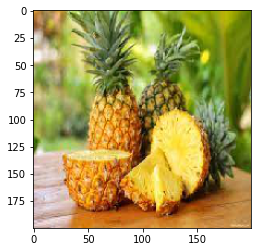

In [149]:
img = load_image('thom.jfif')
plt.imshow(img)
img = img_to_array(img)
#img= cv.GaussianBlur(img,(5,5),0,0)

img = img.reshape(1,200,200,3)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)]) 
if (int(np.max(result*100)) <80):
  print('nằm ngoài tập dữ liệu training')

[[3.6829638e-03 8.0919923e-04 3.7251469e-01 3.4841824e-02 7.4996203e-02
  1.8727746e-06 1.0996819e-06 5.0926745e-01 1.1320183e-06 3.8835688e-03]]
độ chính xác: 50 %
expectation thom
nằm ngoài tập dữ liệu training


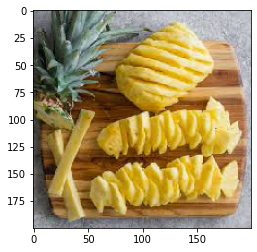

In [153]:
img = load_image('thom.jpg')
plt.imshow(img)
img = img_to_array(img)
#img= cv.GaussianBlur(img,(5,5),0,0)

img = img.reshape(1,200,200,3)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)]) 
if (int(np.max(result*100)) <80):
  print('nằm ngoài tập dữ liệu training')

[[1.2155069e-05 2.0147529e-06 3.4426770e-04 1.2962613e-04 9.9764627e-01
  2.9533396e-07 3.8763665e-06 4.8263636e-04 1.6063508e-07 1.3787259e-03]]
độ chính xác: 99 %
expectation xoai


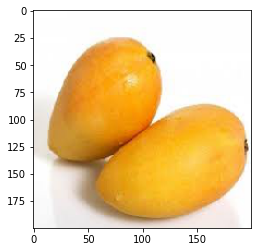

In [163]:
img = load_image('xoai.jpg')
plt.imshow(img)
img = img_to_array(img)
#img= cv.GaussianBlur(img,(25,25),0,0)

img = img.reshape(1,200,200,3)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)]) 
if (int(np.max(result*100)) <80):
  print('nằm ngoài tập dữ liệu training')